In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print('There are {0} rows and {1} columns in the dataset'.format(dataset.shape[0],dataset.shape[1]))

There are 1599 rows and 12 columns in the dataset


In [5]:
#Checking the missing value in the dataset
dataset.isnull().values.any()

False

In [6]:
#Checking for any missing values column wise
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Checking the data types of the columns
dataset.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
#Checking the duplicate values
dataset.duplicated().sum()

240

In [9]:
#Since, we don't have the data for grape types, wine brand, etc lets keep the duplicates.
#We are assuming that the dataset is clean
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Exploratory Analysis and Visualization

In [11]:
#Let's begin by importingmatplotlib.pyplot and seaborn

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

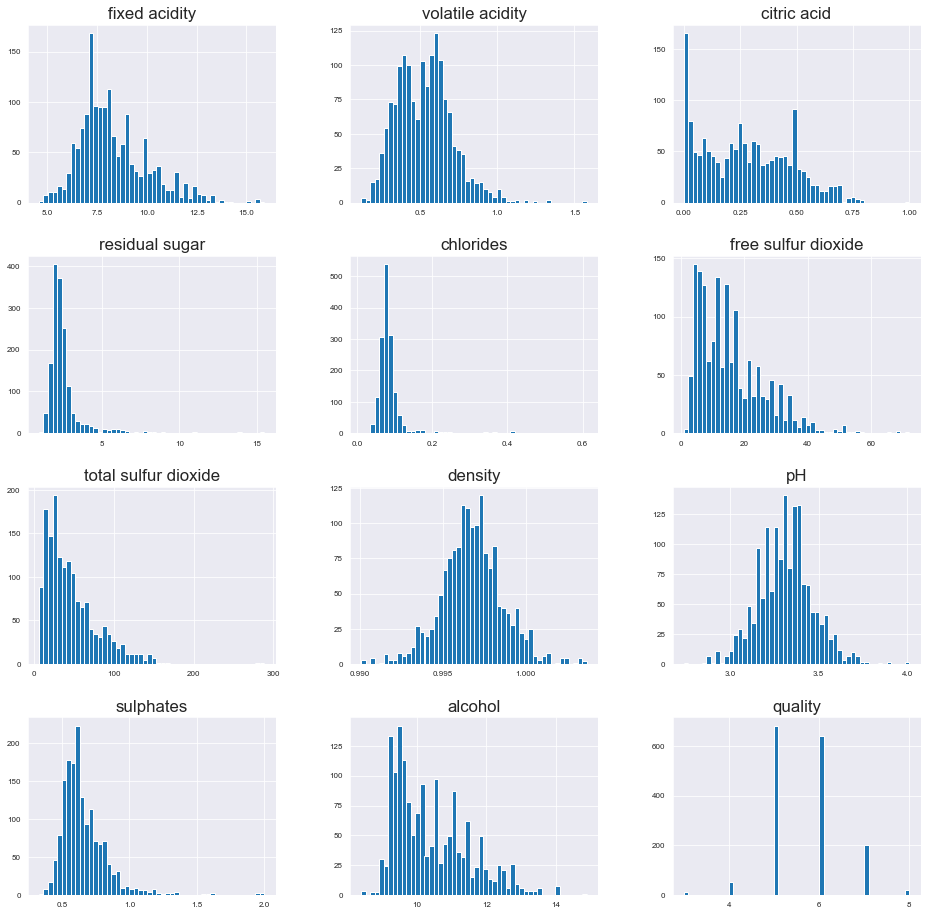

In [14]:
dataset.hist(figsize=(16, 16), bins=50, xlabelsize=8, ylabelsize=8) #freq vs features

In [15]:
#we can clearly observe that the density is normally distributed

In [16]:
#Checking the quality of the wine
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [17]:
#We can observe that most of the quality wine is in the range 5,6,7 and few in 8,3
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

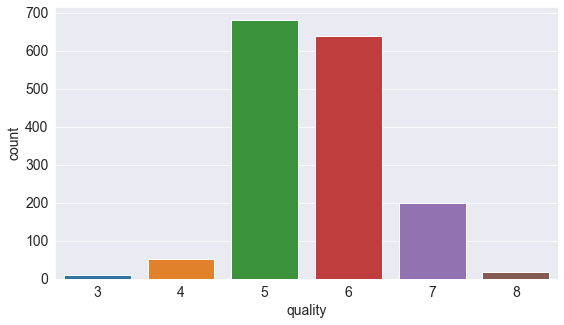

In [18]:
sns.countplot(x="quality",data=dataset)

In [19]:
#checking the outliers

<AxesSubplot:xlabel='fixed acidity'>

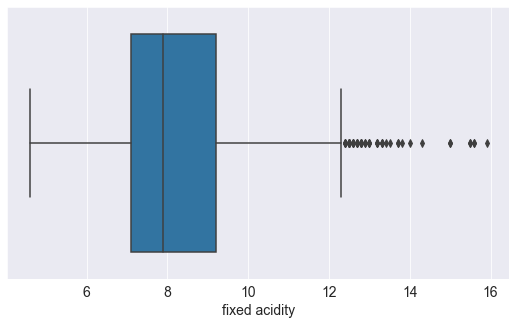

In [20]:
sns.boxplot(x=dataset['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity'>

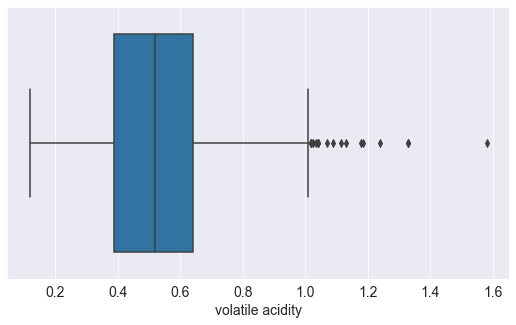

In [21]:
sns.boxplot(x=dataset['volatile acidity'])

<AxesSubplot:xlabel='citric acid'>

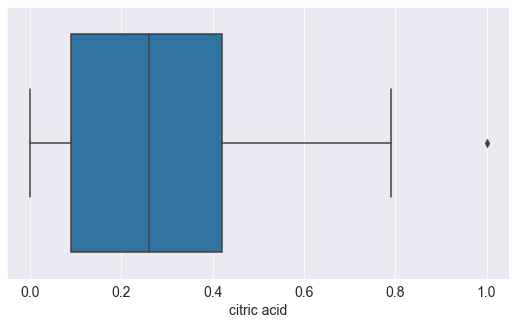

In [22]:
sns.boxplot(x=dataset['citric acid'])

<AxesSubplot:xlabel='residual sugar'>

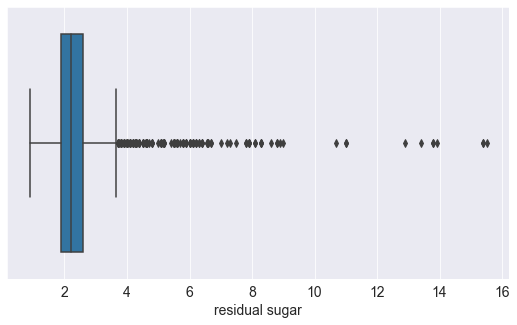

In [23]:
sns.boxplot(x=dataset['residual sugar'])

<AxesSubplot:xlabel='chlorides'>

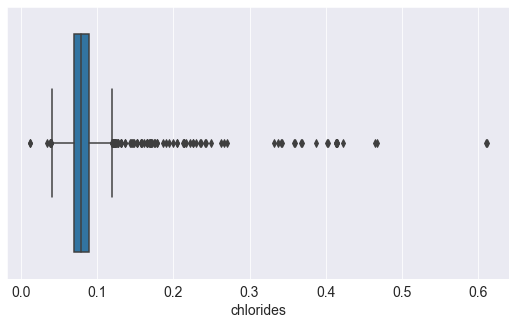

In [24]:
sns.boxplot(x=dataset['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide'>

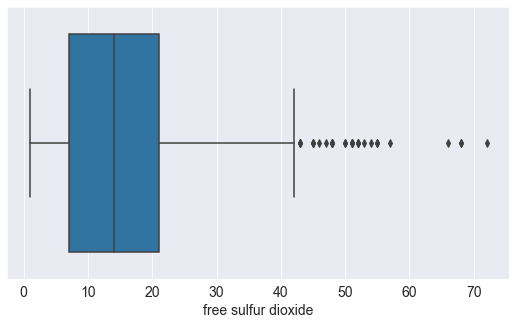

In [25]:
sns.boxplot(x=dataset['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

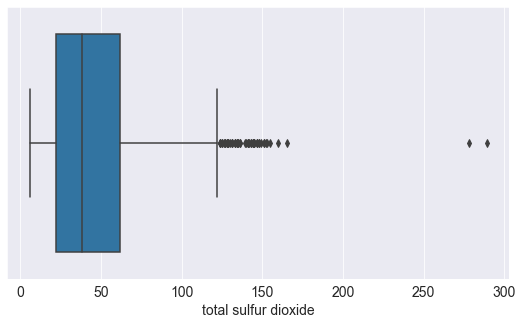

In [26]:
sns.boxplot(x=dataset['total sulfur dioxide'])

<AxesSubplot:xlabel='density'>

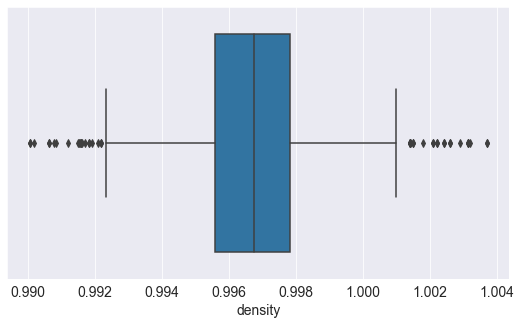

In [27]:
sns.boxplot(x=dataset['density'])

<AxesSubplot:xlabel='pH'>

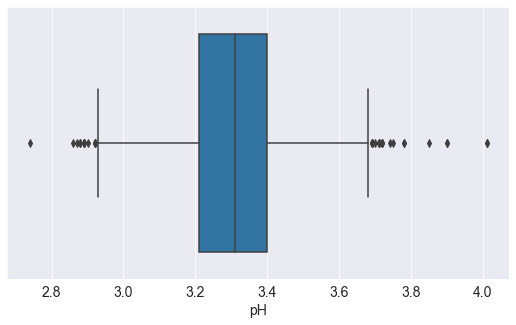

In [28]:
sns.boxplot(x=dataset['pH'])

<AxesSubplot:xlabel='sulphates'>

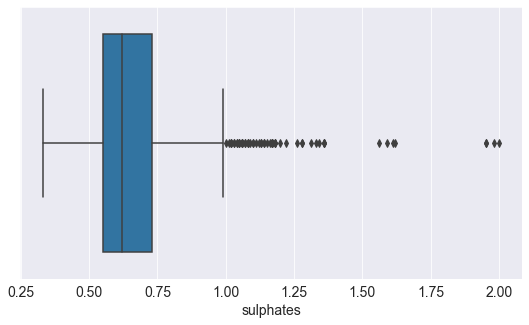

In [29]:
sns.boxplot(x=dataset['sulphates'])


<AxesSubplot:xlabel='alcohol'>

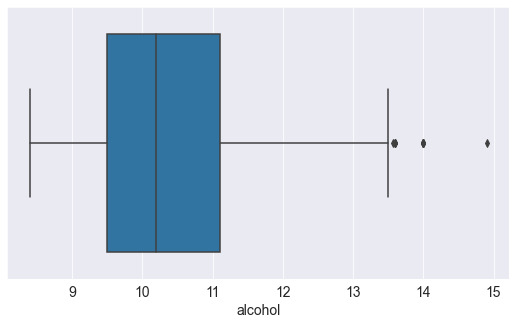

In [30]:
sns.boxplot(x=dataset['alcohol'])


<AxesSubplot:xlabel='quality'>

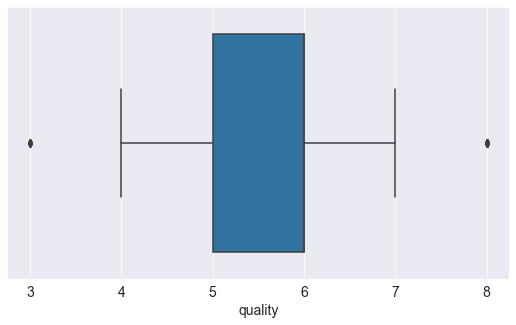

In [31]:
sns.boxplot(x=dataset['quality'])

### Observations

<AxesSubplot:>

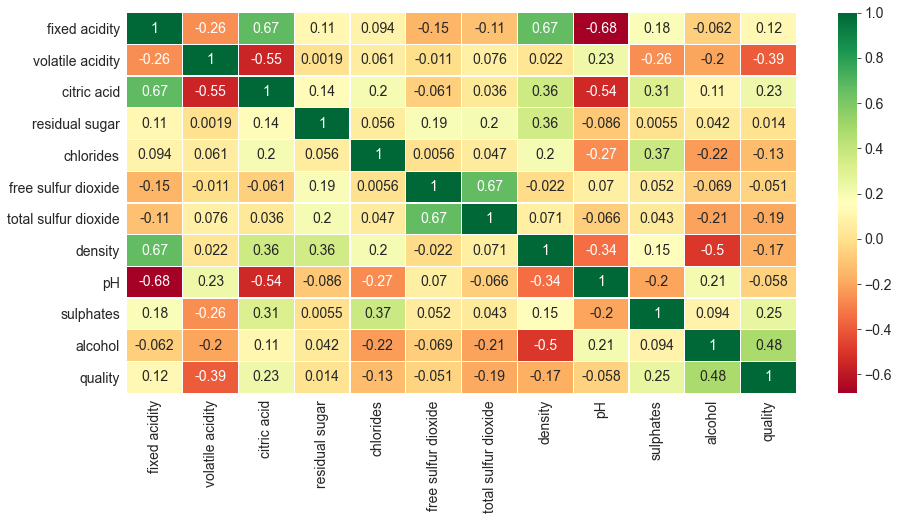

In [35]:
#Correlation
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(dataset.corr(), cmap ='RdYlGn', linewidths = 0.30, annot = True)

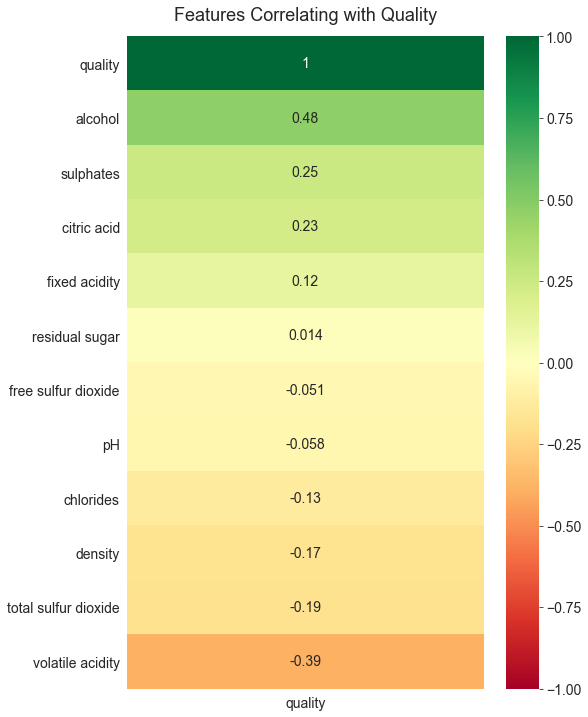

In [36]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataset.corr()[['quality']].sort_values(by='quality', ascending=False), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Features Correlating with Quality', fontdict={'fontsize':18}, pad=16);

Alcohol presence increased the wine quality

# 